# Importing Libraries

In [0]:
#Import
import pandas as pd
import numpy as np

import json
from pandas.io.json import json_normalize

In [0]:
# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Loading data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# df = pd.read_json(''/content/drive/My Drive/dblp-ref-0.json'', lines=True)

In [0]:
df=pd.read_pickle('/content/drive/My Drive/pickle_sentiment')

# Visualising data

In [0]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue,totalOutbounds,ratio
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,1,NaN,2.0,NaN
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,[self],Vectorial fast correlation attacks.,0,2004,35,2,0.0,5,20.486111,NaN,NaN
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,8,NaN,NaN,NaN
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,2,0.000000,1.0,0.0
4,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",00e3940b-201b-40ba-bd20-dbdaf26ad324,6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,0,2013,7,7,6.0,4,NaN,3.0,NaN


In [0]:
df.iloc[0]['abstract']

'This article applied GARCH model instead AR or ARMA model to compare with the standard BP and SVM in forecasting of the four international including two Asian stock markets indices.These models were evaluated on five performance metrics or criteria. Our experimental results showed the superiority of SVM and GARCH models, compared to the standard BP in forecasting of the four international stock markets indices.'

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437643 entries, 0 to 437642
Data columns (total 9 columns):
abstract      352014 non-null object
authors       437643 non-null object
id            437643 non-null object
n_citation    437643 non-null int64
references    401001 non-null object
title         437643 non-null object
venue         437643 non-null object
year          437643 non-null int64
importance    437643 non-null int64
dtypes: int64(3), object(6)
memory usage: 33.4+ MB


# Adding author count and references count

In [0]:
df['author_count']=df['authors'].str.len()

In [0]:
df['references_count']=df['references'].str.len()

# Calculating H-Index

In [0]:
from  itertools import chain

df_flatten_authors = pd.DataFrame({
        "abstract": np.repeat(df.abstract.values, df.authors.str.len()),
        "authors": list(chain.from_iterable(df.authors)),
        "id": np.repeat(df.id.values, df.authors.str.len()),
        "n_citation": np.repeat(df.n_citation.values, df.authors.str.len()),
        "references": np.repeat(df.references.values, df.authors.str.len()),
        "title": np.repeat(df.title.values, df.authors.str.len()),
        "venue": np.repeat(df.venue.values, df.authors.str.len()),
        "year": np.repeat(df.year.values, df.authors.str.len()),
        "importance": np.repeat(df.importance.values, df.authors.str.len()),
        "author_count": np.repeat(df.author_count.values, df.authors.str.len())
})


In [0]:
def h_index_utility2(series):
    count = 0
    sortedSeries = np.sort(series)
    sortedSeries = sortedSeries[::-1]
    i = 1
    for item in sortedSeries:
        if (item < i): #check on equality
            break
        i+=1    
    #series['h_index'] = (i-1)
    return (i-1)

In [0]:
df_flatten_authors_citation = df_flatten_authors[['authors','n_citation']]

In [0]:
df_flatten_authors_citation[df_flatten_authors_citation['n_citation'] > 0].head()

In [0]:
df_flatten_authors.head()

,abstract,author_count,authors,id,importance,n_citation,references,title,venue,year
0,This article applied GARCH model instead AR or...,4,Altaf Hossain,001c8744-73c4-4b04-9364-22d31a10dbf1,0,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009
1,This article applied GARCH model instead AR or...,4,Faisal Zaman,001c8744-73c4-4b04-9364-22d31a10dbf1,0,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009
2,This article applied GARCH model instead AR or...,4,Mohammed Nasser,001c8744-73c4-4b04-9364-22d31a10dbf1,0,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009
3,This article applied GARCH model instead AR or...,4,M. Mufakhkharul Islam,001c8744-73c4-4b04-9364-22d31a10dbf1,0,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009
4,NaN,2,Jovan Dj. Golic,00638a94-23bf-4fa6-b5ce-40d799c65da7,35,2,NaN,Vectorial fast correlation attacks.,,2004


In [0]:
df_flatten_authors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275567 entries, 0 to 1275566
Data columns (total 10 columns):
abstract        1044227 non-null object
author_count    1275567 non-null int64
authors         1275567 non-null object
id              1275567 non-null object
importance      1275567 non-null int64
n_citation      1275567 non-null int64
references      1179265 non-null object
title           1275567 non-null object
venue           1275567 non-null object
year            1275567 non-null int64
dtypes: int64(4), object(6)
memory usage: 97.3+ MB


In [0]:
df_flatten_authors_copy = df_flatten_authors

df_flatten_authors_copy = df_flatten_authors_copy.groupby('authors').agg({'n_citation' : ['sum', h_index_utility2]})

In [0]:
df_flatten_authors_copy.head()

n_citation                 
                                              sum h_index_utility2
authors                                                           
(TYPE=name) (SCHEME=Vancouver) Kahn Ce        183                4
-Jr. Paulo Drews                               19                1
344ehůřek                                      50                1
A Aart Blokhuis                               232                3
A Aleksandra Kuzmanovska                       50                1

In [0]:
df_flatten_authors_copy.columns = ["_".join(x) for x in df_flatten_authors_copy.columns.ravel()]

In [0]:
df_flatten_authors_copy.head()

,n_citation_sum,n_citation_h_index_utility2
authors,,
(TYPE=name) (SCHEME=Vancouver) Kahn Ce,183,4
-Jr. Paulo Drews,19,1
344ehůřek,50,1
A Aart Blokhuis,232,3
A Aleksandra Kuzmanovska,50,1


In [0]:
df_flatten_authors_copy.sort_values(by=['n_citation_h_index_utility2'], ascending=False)

,n_citation_sum,n_citation_h_index_utility2
authors,,
Jiawei Han,23831,65
Andrew Zisserman,25032,64
Philip S. Yu,18918,62
Moshe Y. Vardi,15791,61
Christos Faloutsos,27341,61
Anil K. Jain,25439,59
Amir Pnueli,14859,58
Thomas A. Henzinger,13819,57
Sebastian Thrun,17630,57


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437643 entries, 0 to 437642
Data columns (total 11 columns):
abstract            352014 non-null object
authors             437643 non-null object
id                  437643 non-null object
n_citation          437643 non-null int64
references          401001 non-null object
title               437643 non-null object
venue               437643 non-null object
year                437643 non-null int64
importance          437643 non-null int64
author_count        437643 non-null int64
references_count    401001 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 40.1+ MB


In [0]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",pattern recognition and machine intelligence,2009,0,4,2.0
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,NaN,Vectorial fast correlation attacks.,,2004,35,2,NaN
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[],Multisymplectic Spectral Methods for the Gross...,international conference on conceptual structures,2002,50,2,0.0
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",Relational Abstract Interpretation of Higher O...,,1991,12,2,5.0
4,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",00e3940b-201b-40ba-bd20-dbdaf26ad324,6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,,2013,7,7,6.0


# Implementing Baseline model to identify important features for our metric

LABEL ENCODING

In [0]:
from sklearn import model_selection, preprocessing, metrics

In [0]:
for col in df.select_dtypes(include=[np.object]):
    if col not in ['references','title','abstract','authors','id']:
        print(col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[col].values.astype('str')))
        df[col] = lbl.transform(list(df[col].values.astype('str')))
#       test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

venue


In [0]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,NaN,Vectorial fast correlation attacks.,0,2004,35,2,NaN
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0
4,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",00e3940b-201b-40ba-bd20-dbdaf26ad324,6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,0,2013,7,7,6.0


In [0]:
# train_X=np.column_stack((df_flatten_authors.authors,df_flatten_authors.id,df_flatten_authors.importance,df_flatten_authors.venue,df_flatten_authors.year,df_flatten_authors.author_count))
# train_Y=df_flatten_authors['n_citation']

CLEANING REFERENCES_COUNT

In [0]:
df['references_count'].fillna(0.0,inplace=True)

In [0]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue,totalOutbounds,ratio
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,1,NaN,2.0,NaN
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,[self],Vectorial fast correlation attacks.,0,2004,35,2,0.0,5,20.486111,NaN,NaN
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,8,NaN,NaN,NaN
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,2,0.000000,1.0,0.0
4,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",00e3940b-201b-40ba-bd20-dbdaf26ad324,6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,0,2013,7,7,6.0,4,NaN,3.0,NaN


CLEANING PAGERANK VALUE

In [0]:
df['pageRankValue'].fillna(0.0,inplace=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437643 entries, 0 to 437642
Data columns (total 15 columns):
abstract            352014 non-null object
authors             437643 non-null object
id                  437643 non-null object
n_citation          437643 non-null int64
references          437643 non-null object
title               437643 non-null object
venue               437643 non-null int64
year                437643 non-null int64
importance          437643 non-null int64
author_count        437643 non-null int64
references_count    437643 non-null float64
Topic               437643 non-null int64
pageRankValue       437643 non-null float64
totalOutbounds      323063 non-null float64
ratio               225718 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 53.4+ MB


DROPPING UNNCESSARY COLUMNS

In [0]:
df=df.drop(columns = ['totalOutbounds','ratio'])

In [0]:
df.head(10)

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,1,0.000000
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,[self],Vectorial fast correlation attacks.,0,2004,35,2,0.0,5,20.486111
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,8,0.000000
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,2,0.000000
4,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",00e3940b-201b-40ba-bd20-dbdaf26ad324,6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,0,2013,7,7,6.0,4,0.000000
5,NaN,"[Tien Ho-Phuoc, Anne Guérin-Dugué, Nathalie Gu...",00fd4f6f-c7a1-49a2-a029-d583d1d7a8b1,3,[self],A COMPUTATIONAL SALIENCY MODEL INTEGRATING SAC...,2600,2009,16,3,0.0,2,0.000000
6,NaN,"[Marco Baroni, Francis Chantree, Adam Kilgarri...",01082175-d4e3-456a-9557-668b2449be05,101,[self],Cleaneval: a Competition for Cleaning Web Pages.,2929,2008,74,4,0.0,3,1.374008
7,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",010d4ce9-0279-4166-ae73-14551ded6404,50,"[3c60b421-a347-4d55-b603-bc34f5c2a40d, 4176c23...",Leveraging legacy code to deploy desktop appli...,3052,2008,1311,4,25.0,9,430.434035
8,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[a3a30fff-664e-4e0f-86d5-5eb9a61a6af1, db09268...",Word pairs in language modeling for informatio...,0,2004,154,3,13.0,5,2.482948
9,NaN,"[Prudence W. H. Wong, Fencol C. C. Yung, Mihai...",01546472-0ac9-47fa-acca-ffcb7fc99097,6,"[16bf10ea-67a2-48e5-8d95-6ed620f63e2e, 2ead5bd...",An 8/3 Lower Bound for Online Dynamic Bin Packing,2835,2012,11,3,11.0,8,0.000000


In [0]:
df=df[df.pageRankValue!=0]

In [0]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,[self],Vectorial fast correlation attacks.,0,2004,35,2,0.0,5,20.486111
6,NaN,"[Marco Baroni, Francis Chantree, Adam Kilgarri...",01082175-d4e3-456a-9557-668b2449be05,101,[self],Cleaneval: a Competition for Cleaning Web Pages.,2929,2008,74,4,0.0,3,1.374008
7,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",010d4ce9-0279-4166-ae73-14551ded6404,50,"[3c60b421-a347-4d55-b603-bc34f5c2a40d, 4176c23...",Leveraging legacy code to deploy desktop appli...,3052,2008,1311,4,25.0,9,430.434035
8,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[a3a30fff-664e-4e0f-86d5-5eb9a61a6af1, db09268...",Word pairs in language modeling for informatio...,0,2004,154,3,13.0,5,2.482948
17,NaN,"[Balan Venkatesh, S. Palanivel, B. Yegnanarayana]",02a58862-0024-4e20-9993-35a8706681b3,50,"[b85ac095-a9f2-4954-b2bf-f53fde98958c, bf4faf6...","Face Detection, Recognition in an Image Sequen...",0,2002,207,3,8.0,5,1.361111


FOR BASELINE, X VALUES WILL BE ALL THE NUMERICAL FEATURES. Y LABEL WILL BE PAGERANK SCORE

In [0]:
train_X=np.column_stack((df.importance,df.venue,df.year,df.author_count,df.references_count,df.Topic,df.n_citation))
train_Y=df['pageRankValue']

In [0]:
train_Y[:5]

1      20.486111
6       1.374008
7     430.434035
8       2.482948
17      1.361111
Name: pageRankValue, dtype: float64

# USING LINEAR REGRESSION FIRST

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.47438309716756655

In [0]:
!pip install lightgbm

    100% |████████████████████████████████| 1.2MB 8.5MB/s 


# USING LGBM NEXT

In [0]:
import lightgbm as lgb

In [0]:
# params = {
#         'nthread': -1,
#         "learning_rate" : 0.01,
#     }
# #Default Parameters

# train_set = lgb.Dataset(train_X, train_Y, silent=True)
# model2 = lgb.train(params, train_set = train_set, num_boost_round=300)

In [0]:
dev_X = X_train
val_X = X_test
dev_y = y_train
val_y = y_test

In [0]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
#     pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

# Training the model #
model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 279.284
Early stopping, best iteration is:
[80]	valid_0's rmse: 278.435


In [0]:
# from sklearn import metrics
# val_pred_df=pd.DataFrame(index=index,column=columns)
# val_pred_df["original_citation_count"] = val_y
# val_pred_df["predicted_citation_count"]=pred_val
# print(np.sqrt(metrics.mean_squared_error(val_pred_df["original_citation_count"].values, val_pred_df["PredictedRevenue"].values)))

In [0]:
# import matplotlib.pyplot as plt

In [0]:
train_X[:10]

array([[3.500e+01, 0.000e+00, 2.004e+03, 2.000e+00, 0.000e+00, 5.000e+00,
        2.000e+00],
       [7.400e+01, 2.929e+03, 2.008e+03, 4.000e+00, 0.000e+00, 3.000e+00,
        1.010e+02],
       [1.311e+03, 3.052e+03, 2.008e+03, 4.000e+00, 2.500e+01, 9.000e+00,
        5.000e+01],
       [1.540e+02, 0.000e+00, 2.004e+03, 3.000e+00, 1.300e+01, 5.000e+00,
        5.000e+01],
       [2.070e+02, 0.000e+00, 2.002e+03, 3.000e+00, 8.000e+00, 5.000e+00,
        5.000e+01],
       [6.300e+01, 5.640e+02, 2.002e+03, 2.000e+00, 1.000e+01, 9.000e+00,
        5.000e+01],
       [1.290e+02, 2.029e+03, 1.989e+03, 4.000e+00, 1.000e+00, 2.000e+00,
        5.000e+01],
       [8.300e+01, 2.226e+03, 1.994e+03, 2.000e+00, 0.000e+00, 5.000e+00,
        1.000e+01],
       [6.000e+01, 0.000e+00, 2.013e+03, 3.000e+00, 1.400e+01, 8.000e+00,
        2.600e+01],
       [5.000e+01, 0.000e+00, 1.989e+03, 3.000e+00, 0.000e+00, 2.000e+00,
        5.000e+01]])

# FEATURE IMPORTANCE PLOT

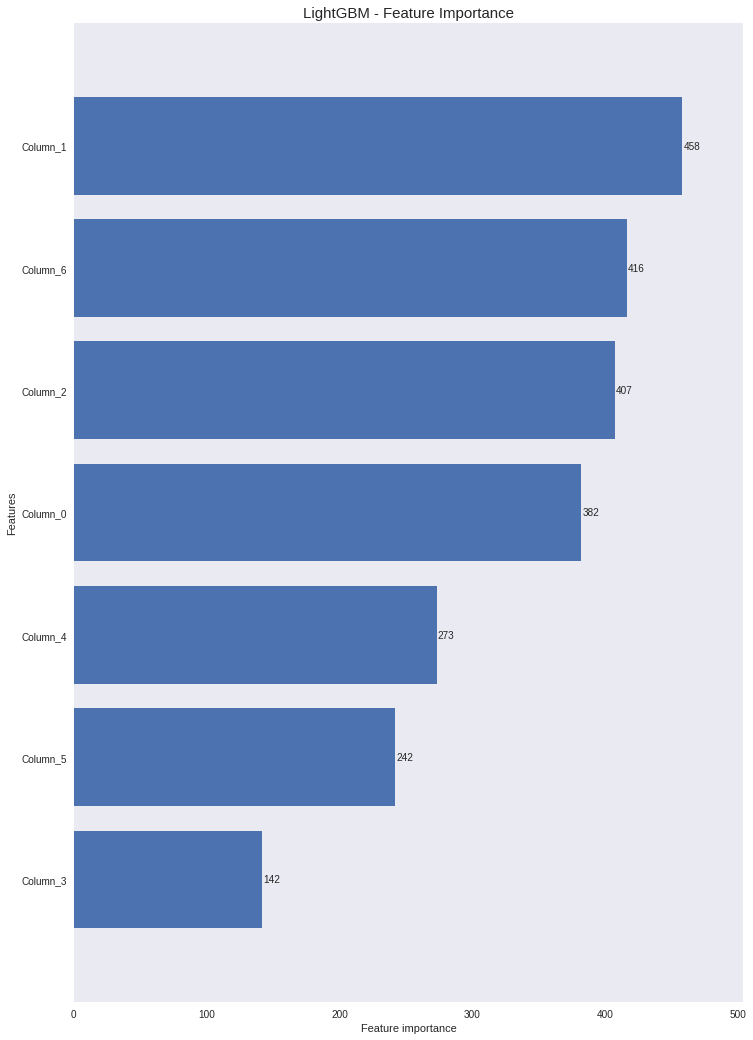

In [0]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

# TOPIC MODELLING USING LDA

EXTRACTING TITLE

In [0]:
data_text = df[['title']]
data_text['index'] = df.index
documents = data_text
print(len(documents))
print(documents.head())

437643
                                               title  index
0  Comparison of GARCH, Neural Network and Suppor...      0
1                Vectorial fast correlation attacks.      1
2  Multisymplectic Spectral Methods for the Gross...      2
3  Relational Abstract Interpretation of Higher O...      3
4  A Platform for Disaster Response Planning with...      4


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
!pip install gensim

In [0]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

LEMMATISING, REMOVING STOPWORDS AND TOKENISING

In [0]:
print(WordNetLemmatizer().lemmatize('went', pos='v'))

go


In [0]:
def lemmatize_stemming(text):
    stemmer = SnowballStemmer('english')
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [0]:
doc_sample = documents[documents['index'] == 4310].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document: 
['On', 'the', 'use', 'of', 'visual', 'information', 'for', 'improving', 'audio-based', 'speaker', 'recognition.']


 tokenized and lemmatized document: 
['visual', 'inform', 'improv', 'audio', 'base', 'speaker', 'recognit']


In [0]:
df['title'].isna().sum()

0

In [0]:
processed_docs = documents['title'].map(preprocess)
processed_docs[:10]

0    [comparison, garch, neural, network, support, ...
1                      [vectori, fast, correl, attack]
2    [multisymplect, spectral, method, gross, pitae...
3    [relat, abstract, interpret, higher, order, fu...
4    [platform, disast, respons, plan, interdepend,...
5    [comput, salienc, model, integr, saccad, program]
6                     [cleanev, competit, clean, page]
7     [leverag, legaci, code, deploy, desktop, applic]
8        [word, pair, languag, model, inform, retriev]
9                    [lower, bind, onlin, dynam, pack]
Name: title, dtype: object

In [0]:
len(processed_docs)

437643

In [0]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 15:
        break

0 comparison
1 financi
2 garch
3 machin
4 network
5 neural
6 predict
7 seri
8 support
9 time
10 vector
11 attack
12 correl
13 fast
14 vectori
15 equat


In [0]:
# dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [0]:
len(dictionary)

52033

USING BAG OF WORDS TECHNIQUE

In [0]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(50, 1), (64, 1), (73, 1), (98, 1), (124, 1), (226, 1), (692, 1)]

In [0]:
len(bow_corpus)

437643

In [0]:
bow_doc_4310 = bow_corpus[4310]

for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                                     dictionary[bow_doc_4310[i][0]], 
                                                     bow_doc_4310[i][1]))

Word 50 ("inform") appears 1 time.
Word 64 ("base") appears 1 time.
Word 73 ("recognit") appears 1 time.
Word 98 ("visual") appears 1 time.
Word 124 ("audio") appears 1 time.
Word 226 ("improv") appears 1 time.
Word 692 ("speaker") appears 1 time.


USING TFID TECHNIQUE (NOT USED FINALLY)

In [0]:
# from gensim import corpora, models

# tfidf = models.TfidfModel(bow_corpus)

In [0]:
# corpus_tfidf = tfidf[bow_corpus]

In [0]:
# from pprint import pprint

# for doc in corpus_tfidf:
#     pprint(doc)
#     break

[(0, 0.27371518359048214),
 (1, 0.3802414996090363),
 (2, 0.5611681406711465),
 (3, 0.2448419426745291),
 (4, 0.1456413375062651),
 (5, 0.24081839737908176),
 (6, 0.24515500195622777),
 (7, 0.3208444017137536),
 (8, 0.22372330147078995),
 (9, 0.1868238494450325),
 (10, 0.2800658317354026)]


In [0]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

# OUTPUT OF LDA TOPIC MODELLING

In [0]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.033*"program" + 0.022*"logic" + 0.021*"model" + 0.019*"oper" + 0.018*"theori" + 0.017*"game" + 0.017*"order" + 0.016*"system" + 0.015*"type" + 0.013*"constraint"
Topic: 1 
Words: 0.040*"system" + 0.035*"model" + 0.029*"design" + 0.025*"softwar" + 0.024*"base" + 0.020*"process" + 0.020*"develop" + 0.015*"manag" + 0.014*"architectur" + 0.014*"test"
Topic: 2 
Words: 0.032*"object" + 0.020*"multi" + 0.019*"context" + 0.017*"alloc" + 0.017*"resourc" + 0.016*"orient" + 0.015*"agent" + 0.015*"communic" + 0.014*"base" + 0.013*"servic"
Topic: 3 
Words: 0.032*"perform" + 0.028*"machin" + 0.027*"studi" + 0.020*"evalu" + 0.015*"sourc" + 0.015*"vector" + 0.014*"high" + 0.014*"fault" + 0.014*"analysi" + 0.013*"digit"
Topic: 4 
Words: 0.042*"imag" + 0.037*"base" + 0.021*"model" + 0.020*"recognit" + 0.017*"featur" + 0.016*"detect" + 0.015*"classif" + 0.012*"automat" + 0.011*"segment" + 0.011*"learn"
Topic: 5 
Words: 0.034*"control" + 0.031*"interact" + 0.028*"robot" + 0.025*"user" +

In [0]:
# lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [0]:
# for idx, topic in lda_model_tfidf.print_topics(-1):
#     print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.023*"network" + 0.014*"wireless" + 0.011*"sensor" + 0.008*"time" + 0.008*"rout" + 0.008*"system" + 0.007*"control" + 0.007*"power" + 0.007*"base" + 0.007*"perform"
Topic: 1 Word: 0.008*"recognit" + 0.008*"speech" + 0.007*"base" + 0.007*"learn" + 0.007*"model" + 0.006*"text" + 0.005*"machin" + 0.005*"classif" + 0.005*"featur" + 0.004*"analysi"
Topic: 2 Word: 0.005*"polygon" + 0.005*"digit" + 0.004*"expert" + 0.004*"cmos" + 0.004*"librari" + 0.004*"squar" + 0.004*"intersect" + 0.004*"technic" + 0.004*"span" + 0.004*"topic"
Topic: 3 Word: 0.016*"graph" + 0.010*"problem" + 0.009*"algorithm" + 0.009*"program" + 0.008*"logic" + 0.007*"tree" + 0.007*"bound" + 0.006*"approxim" + 0.006*"complex" + 0.006*"linear"
Topic: 4 Word: 0.019*"imag" + 0.010*"base" + 0.009*"object" + 0.008*"segment" + 0.008*"video" + 0.007*"detect" + 0.007*"motion" + 0.007*"track" + 0.007*"recognit" + 0.006*"model"
Topic: 5 Word: 0.007*"swarm" + 0.006*"particl" + 0.006*"net" + 0.006*"gene" + 0.005*"petri"

In [0]:
# lda_model_tfidf_5 = gensim.models.LdaMulticore(corpus_tfidf, num_topics=5, id2word=dictionary, passes=2, workers=4)

In [0]:
# for idx, topic in lda_model_tfidf_5.print_topics(-1):
#     print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.011*"program" + 0.011*"logic" + 0.008*"fuzzi" + 0.008*"model" + 0.007*"base" + 0.006*"system" + 0.006*"languag" + 0.005*"data" + 0.005*"semant" + 0.005*"fault"
Topic: 1 Word: 0.009*"graph" + 0.008*"algorithm" + 0.007*"imag" + 0.006*"problem" + 0.006*"base" + 0.005*"method" + 0.005*"tree" + 0.005*"approxim" + 0.004*"model" + 0.004*"cod"
Topic: 2 Word: 0.008*"servic" + 0.008*"model" + 0.008*"system" + 0.008*"manag" + 0.008*"base" + 0.008*"softwar" + 0.008*"design" + 0.007*"inform" + 0.007*"network" + 0.006*"mobil"
Topic: 3 Word: 0.013*"network" + 0.008*"control" + 0.007*"wireless" + 0.007*"optim" + 0.006*"schedul" + 0.006*"algorithm" + 0.006*"system" + 0.006*"time" + 0.006*"base" + 0.006*"channel"
Topic: 4 Word: 0.009*"imag" + 0.007*"base" + 0.007*"video" + 0.005*"retriev" + 0.005*"detect" + 0.005*"data" + 0.004*"model" + 0.004*"analysi" + 0.004*"visual" + 0.004*"mine"


In [0]:
processed_docs[4310]

['visual', 'inform', 'improv', 'audio', 'base', 'speaker', 'recognit']

In [0]:
# for index, score in sorted(lda_model_tfidf[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
#     print("\nScore: {}\t \nTopic: {}".format(score, lda_model_tfidf.print_topic(index, 10)))


Score: 0.8874842524528503	 
Topic: 0.008*"recognit" + 0.008*"speech" + 0.007*"base" + 0.007*"learn" + 0.007*"model" + 0.006*"text" + 0.005*"machin" + 0.005*"classif" + 0.005*"featur" + 0.004*"analysi"

Score: 0.012503263540565968	 
Topic: 0.019*"imag" + 0.010*"base" + 0.009*"object" + 0.008*"segment" + 0.008*"video" + 0.007*"detect" + 0.007*"motion" + 0.007*"track" + 0.007*"recognit" + 0.006*"model"

Score: 0.012503186240792274	 
Topic: 0.011*"model" + 0.010*"base" + 0.009*"inform" + 0.008*"system" + 0.008*"knowledg" + 0.008*"softwar" + 0.008*"process" + 0.007*"data" + 0.007*"approach" + 0.006*"design"

Score: 0.012502088211476803	 
Topic: 0.012*"mobil" + 0.012*"servic" + 0.009*"environ" + 0.008*"base" + 0.008*"manag" + 0.008*"agent" + 0.008*"network" + 0.007*"system" + 0.007*"robot" + 0.007*"virtual"

Score: 0.012501387856900692	 
Topic: 0.007*"swarm" + 0.006*"particl" + 0.006*"net" + 0.006*"gene" + 0.005*"petri" + 0.005*"model" + 0.005*"base" + 0.005*"optim" + 0.005*"data" + 0.004*"

TESTING

In [0]:
unseen_document = 'Introduction to Information Retrieval'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
print(bow_vector)
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 1)))
    break

[(50, 1), (53, 1), (2174, 1)]
Score: 0.5232177376747131	 Topic: 0.043*"data"


In [ ]:
df['Topic']=bow_corpus.map(lda_model.print_topic(index, 1))

In [0]:
ltemp=[0]*len(df_flatten_authors)

In [0]:
df_flatten_authors['Topic']=ltemp

In [0]:
for bow_vector in bow_corpus:
  for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
      ltemp.append(lda_model.print_topic(index, 1))
      break

In [0]:
ltemp[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [0]:
ltemp1=ltemp[-(len(bow_corpus)):]

In [0]:
ltemp1[:10]

['0.032*"perform"',
 '0.042*"imag"',
 '0.052*"algorithm"',
 '0.033*"program"',
 '0.040*"system"',
 '0.033*"program"',
 '0.034*"control"',
 '0.101*"network"',
 '0.042*"imag"',
 '0.052*"algorithm"']

In [0]:
for index, score in sorted(lda_model[bow_corpus[9]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))
    break


Score: 0.8499549031257629	 
Topic: 0.052*"algorithm" + 0.035*"problem" + 0.026*"graph" + 0.022*"optim" + 0.015*"method" + 0.013*"approxim" + 0.011*"parallel" + 0.010*"equat" + 0.009*"linear" + 0.009*"tree"


# INCORPORATING TOPIC TO FINAL DATAFRAME

In [0]:
df['Topic']=ltemp1

In [0]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,"0.032*""perform"""
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,NaN,Vectorial fast correlation attacks.,0,2004,35,2,0.0,"0.042*""imag"""
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,"0.052*""algorithm"""
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,"0.033*""program"""
4,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",00e3940b-201b-40ba-bd20-dbdaf26ad324,6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,0,2013,7,7,6.0,"0.040*""system"""


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 437643 entries, 0 to 437642
Data columns (total 12 columns):
abstract            352014 non-null object
authors             437643 non-null object
id                  437643 non-null object
n_citation          437643 non-null int64
references          401001 non-null object
title               437643 non-null object
venue               437643 non-null int64
year                437643 non-null int64
importance          437643 non-null int64
author_count        437643 non-null int64
references_count    437643 non-null float64
Topic               437643 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 63.4+ MB


In [0]:
for col in df.select_dtypes(include=[np.object]):
    if col not in ['references','title','abstract','authors','id']:
        print(col)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[col].values.astype('str')))
        df[col] = lbl.transform(list(df[col].values.astype('str')))
#       test_df[col] = lbl.transform(list(test_df[col].values.astype('str')))

Topic


In [0]:
df.head(10)

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,1
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,NaN,Vectorial fast correlation attacks.,0,2004,35,2,0.0,5
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,8
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,"[6e8a3ec3-9a99-4fac-ac4d-f8d1bf0fa208, 7bb71af...",Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,2
4,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",00e3940b-201b-40ba-bd20-dbdaf26ad324,6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,0,2013,7,7,6.0,4
5,NaN,"[Tien Ho-Phuoc, Anne Guérin-Dugué, Nathalie Gu...",00fd4f6f-c7a1-49a2-a029-d583d1d7a8b1,3,NaN,A COMPUTATIONAL SALIENCY MODEL INTEGRATING SAC...,2600,2009,16,3,0.0,2
6,NaN,"[Marco Baroni, Francis Chantree, Adam Kilgarri...",01082175-d4e3-456a-9557-668b2449be05,101,NaN,Cleaneval: a Competition for Cleaning Web Pages.,2929,2008,74,4,0.0,3
7,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",010d4ce9-0279-4166-ae73-14551ded6404,50,"[0abc9de7-e047-44fc-998d-4bf02b9bc9ab, 2c9ebc3...",Leveraging legacy code to deploy desktop appli...,3052,2008,1311,4,25.0,9
8,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[00515e82-3da6-497a-83d3-459e93247123, 0cd820e...",Word pairs in language modeling for informatio...,0,2004,154,3,13.0,5
9,NaN,"[Prudence W. H. Wong, Fencol C. C. Yung, Mihai...",01546472-0ac9-47fa-acca-ffcb7fc99097,6,"[08784bb3-09b9-4bd2-a191-2606f3b3a8b8, 16bf10e...",An 8/3 Lower Bound for Online Dynamic Bin Packing,2835,2012,11,3,11.0,8


In [0]:
df.to_pickle('/content/drive/My Drive/pickle_topic')

In [0]:
df=pd.read_pickle('/content/drive/My Drive/pickle_topic')

In [0]:
df['Topic'].unique()

array([1, 5, 8, 2, 4, 3, 9, 7, 6, 0])

TRYING OUT SCHOLARLY (NOT USED FINALLY)

In [0]:
!pip install scholarly

In [ ]:
import scholarly

print(next(scholarly.search_author('Steven A. Cholewiak')))

# CITATION SENTIMENT ANALYSIS

In [0]:
!pip install textblob

    100% |████████████████████████████████| 645kB 6.3MB/s 


In [0]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue,totalOutbounds,ratio
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,1,NaN,2.0,NaN
1,NaN,"[Jovan Dj. Golic, Guglielmo Morgari]",00638a94-23bf-4fa6-b5ce-40d799c65da7,2,[self],Vectorial fast correlation attacks.,0,2004,35,2,0.0,5,20.486111,NaN,NaN
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,8,NaN,NaN,NaN
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,2,0.000000,1.0,0.0
4,NaN,"[Abdullah Alsubaie, Antonio Di Pietro, Jose R....",00e3940b-201b-40ba-bd20-dbdaf26ad324,6,"[0293844d-7244-4562-a6ca-d84bcd9c10a5, 14cd3cf...",A Platform for Disaster Response Planning with...,0,2013,7,7,6.0,4,NaN,3.0,NaN


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352014 entries, 0 to 437642
Data columns (total 15 columns):
abstract            352014 non-null object
authors             352014 non-null object
id                  352014 non-null object
n_citation          352014 non-null int64
references          352014 non-null object
title               352014 non-null object
venue               352014 non-null int64
year                352014 non-null int64
importance          352014 non-null int64
author_count        352014 non-null int64
references_count    352014 non-null float64
Topic               352014 non-null int64
pageRankValue       237349 non-null float64
totalOutbounds      273254 non-null float64
ratio               189723 non-null float64
dtypes: float64(4), int64(6), object(5)
memory usage: 43.0+ MB


In [0]:
df.shape[0]

352014

WE WILL USE EXTRACT OF THE PAPER TO CALCULATE ITS SENTIMENT

In [0]:
df=df.dropna(subset=['abstract'])

In [0]:
from textblob import TextBlob 

In [0]:
for i in range(40):
  analysis = TextBlob(df.iloc[i]['abstract']) 
    # set sentiment 
  if analysis.sentiment.polarity > 0: 
      print('positive')
  elif analysis.sentiment.polarity == 0: 
      print('neutral')
  else: 
      print('negative')

positive
neutral
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
negative
positive
negative
positive
positive
positive
positive
positive


In [0]:
for i in range(20):
  analysis = TextBlob(df.iloc[i]['title']) 
    # set sentiment 
  if analysis.sentiment.polarity > 0: 
      print('positive')
  elif analysis.sentiment.polarity == 0: 
      print('neutral')
  else: 
      print('negative')

neutral
neutral
positive
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
neutral
positive
neutral
neutral
neutral
negative
positive
neutral
neutral


In [0]:
df.iloc[5]['abstract']

'Spatial encryption is a generic public-key cryptosystem where vectors play the role of public keys and secret keys are associated to affine spaces. Any secret key associated to a space can decrypt all ciphertexts encrypted for vectors in that space, and the delegation relation is defined by subspace inclusion. Though several constructions of spatial encryption schemes have been proposed in the literature, none of them are known to remain secure in the leakage-resilient setting, in which the adversary may be capable of learning limited additional information about the master secret key and other secret keys in the system. In this paper, we propose the first spatial encryption scheme achieving leakage resilience in the standard model, based on existing static assumptions over bilinear groups of composite order. Our new scheme is based on the leakageresilient HIBE scheme by Lewko, Rouselakis, and Waters in TCC 2011 and can be seen as a generalization of Moriyama-Doi spatial encryption sc

USING SENTIMENT INTENSITY ANALYSER FROM VADE IN NLTK

In [0]:
from nltk.sentiment import SentimentAnalyzer

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [0]:
sia = SIA()

In [0]:
for i in range(40):
  pol_score = sia.polarity_scores(df.iloc[i]['abstract'])
    # set sentiment
  print(pol_score['compound'])
  if pol_score['compound'] > 0.2: 
      print('positive')
  elif pol_score['compound'] < -0.2: 
      print('negative')
  else: 
      print('neutral')


0.34
positive
0.1779
neutral
0.34
positive
0.7506
positive
-0.5771
negative
0.5719
positive
0.34
positive
0.9382
positive
0.9337
positive
-0.2263
negative
0.0772
neutral
-0.1548
neutral
0.9161
positive
0.3832
positive
0.9577
positive
-0.9186
negative
0.9513
positive
0.6865
positive
0.8074
positive
0.8313
positive
0.0
neutral
0.0258
neutral
0.9771
positive
0.25
positive
0.2332
positive
0.6124
positive
0.802
positive
-0.5525
negative
0.8176
positive
0.5719
positive
0.0
neutral
0.8955
positive
0.899
positive
0.8316
positive
0.2204
positive
0.296
positive
-0.1786
neutral
0.9042
positive
0.7579
positive
0.8289
positive


ASSIGNING SENTIMENT BASED ON POLARITY SCORE

In [0]:
res=[]
for i in range(df.shape[0]):
  pol_score = sia.polarity_scores(df.iloc[i]['abstract'])
    # set sentiment
#   print(pol_score['compound'])
  if pol_score['compound'] > 0.2: 
      res.append(1)
  elif pol_score['compound'] < -0.2: 
     res.append(-1)
  else: 
      res.append(0)
df['sentiment']=res

In [0]:
df.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue,totalOutbounds,ratio,sentiment
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,1,NaN,2.0,NaN,1
2,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,8,NaN,NaN,NaN,0
3,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,2,0.000000,1.0,0.000000,1
7,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",010d4ce9-0279-4166-ae73-14551ded6404,50,"[3c60b421-a347-4d55-b603-bc34f5c2a40d, 4176c23...",Leveraging legacy code to deploy desktop appli...,3052,2008,1311,4,25.0,9,430.434035,9.0,47.826004,1
8,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[a3a30fff-664e-4e0f-86d5-5eb9a61a6af1, db09268...",Word pairs in language modeling for informatio...,0,2004,154,3,13.0,5,2.482948,2.0,1.241474,-1


In [0]:
df.to_pickle('/content/drive/My Drive/pickle_sentiment')

In [0]:
df.iloc[4]['abstract']

'Previous language modeling approaches to information retrieval have focused primarily on single terms. The use of bigram models has been studied, but the restriction on word order and adjacency may not be justified for information retrieval. We propose a new language modeling approach to information retrieval that incorporates lexical affinities, or pairs of words that occur near each other, without a constraint on word order. The use of compound terms in the vector space model has been shown to outperform the vector model with only single terms (Nie & Dufort, 2002). We explore the use of compound terms in a language modeling approach, and compare our results with the vector space model, and unigram and bigram language model approaches.'

In [0]:
df['sentiment'].value_counts()

 1    258079
-1     53956
 0     39979
Name: sentiment, dtype: int64

In [0]:
from  itertools import chain

df_flatten_references = pd.DataFrame({
        "sentiment": np.repeat(df.sentiment.values, df.references.str.len()),
        "references": list(chain.from_iterable(df.references))
})
df_flatten_references_importance = df_flatten_references.groupby('references').agg({'sentiment' : 'sum'})
df_flatten_references_importance['id'] = df_flatten_references_importance.index


In [0]:
df_flatten_references_importance.head()

,sentiment,id
references,,
000000b8-7f59-49ad-b9bc-e92aa858fc37,1,000000b8-7f59-49ad-b9bc-e92aa858fc37
00001301-0e56-4c9d-94aa-f776580aed87,1,00001301-0e56-4c9d-94aa-f776580aed87
00001bf6-0c0c-4264-a81b-0f1ddab7a25a,1,00001bf6-0c0c-4264-a81b-0f1ddab7a25a
00001d52-f2bd-4137-8d6b-b34e65a972bf,1,00001d52-f2bd-4137-8d6b-b34e65a972bf
00001fb9-b0eb-49e5-b893-eb9b47c78910,1,00001fb9-b0eb-49e5-b893-eb9b47c78910


# INTEGRATING SENTIMENT TO FINAL DATAFRAME

In [0]:
df_flatten_references_importance['citation_sentiment'] = df_flatten_references_importance['sentiment']

In [0]:
df_result = pd.merge(df, df_flatten_references_importance[['id', 'citation_sentiment']], on='id', how='left')

In [0]:
df_result.head(20)

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,references_count,Topic,pageRankValue,totalOutbounds,ratio,sentiment,citation_sentiment
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,2.0,1,NaN,2.0,NaN,1,0.0
1,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,0.0,8,NaN,NaN,NaN,0,0.0
2,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,5.0,2,0.000000,1.0,0.000000,1,1.0
3,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",010d4ce9-0279-4166-ae73-14551ded6404,50,"[3c60b421-a347-4d55-b603-bc34f5c2a40d, 4176c23...",Leveraging legacy code to deploy desktop appli...,3052,2008,1311,4,25.0,9,430.434035,9.0,47.826004,1,4.0
4,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[a3a30fff-664e-4e0f-86d5-5eb9a61a6af1, db09268...",Word pairs in language modeling for informatio...,0,2004,154,3,13.0,5,2.482948,2.0,1.241474,-1,1.0
5,Spatial encryption is a generic public-key cry...,"[Michel Abdalla, Jill-Jênn Vie]",016a9a21-e882-4cda-a2b1-b2b46f10601e,50,"[3140c9ba-8d98-42a7-b6b8-c58fdaa8fe75, 4708b4d...",Leakage-Resilient spatial encryption,0,2012,0,2,8.0,7,NaN,7.0,NaN,1,0.0
6,In system operations the term rollback is ofte...,"[Mark Burgess, Alva L. Couch]",01705f09-d395-4a0f-a89f-8d18382c81cc,8,"[3a6f3221-72f5-45d4-9fc4-8e7f8944bf50, 5ae2116...",On system rollback and totalized fields: An al...,1768,2011,2,2,15.0,8,0.000000,7.0,0.000000,1,1.0
7,Business strategy should be well understood in...,"[Constantinos Giannoulis, Jelena Zdravkovic, M...",01b6f2ca-3903-4196-a932-47a4be4c00bf,12,"[0ce446cf-4f4f-49d5-b08c-e7dcacebf53b, feb8471...",Model-Driven Strategic Awareness: From a Unifi...,0,2012,56,3,9.0,4,0.000000,2.0,0.000000,1,0.0
8,Quality specified image retrieval is helpful t...,"[Qiong Liu, You Yang, Xu Wang, Liujuan Cao]",02a5e8a8-061e-4c1f-ab16-bda035578e54,3,"[04f8d077-765a-4145-bf14-bace8fc3a7c9, 07b11cc...",Quality Assessment on User Generated Image for...,2227,2013,0,4,25.0,6,NaN,6.0,NaN,1,0.0
9,"In this paper, we investigate the multi-layer ...","[Ying Wu, Thomas K. Doyle, Colin Fyfe]",03990c4b-45be-4913-80d6-27d3b3381b36,50,[self],Multi-layer topology preserving mapping for K-...,2548,2011,4,3,7.0,9,NaN,NaN,NaN,-1,0.0


In [0]:
df_result['citation_sentiment'].isna().sum()

126120

In [0]:
df_result['citation_sentiment'].fillna(0.0,inplace=True)

In [0]:
if '001c8744-73c4-4b04-9364-22d31a10dbf1' in chain.from_iterable(df_result['references']):
  print("True")
else:
  print("False")

False


In [0]:
'' in chain.from_iterable(example_list)

In [0]:
final_df = df_result[['id', 'sentiment', 'citation_sentiment']].copy()

# PERFORMING TIME ANALYSIS

In [0]:
final_df.to_pickle('/content/drive/My Drive/pickle_citation_sentiment_analysis')

In [0]:
df1=pd.read_pickle('drive/My Drive/ayush_ranking_score_plus_z_score')
df2=pd.read_pickle('drive/My Drive/complete_data')
df3=pd.read_pickle('drive/My Drive/gaurav_share')

In [23]:
df2.head()

,abstract,authors,id,n_citation,references,title,venue,year,importance,author_count,...,venue_citation_max,venue_citation_count,venue_citation_avg,domain_citation_sum,domain_citation_max,domain_citation_count,domain_citation_avg,citation_sentiment,time_factor,reach
0,This article applied GARCH model instead AR or...,"[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...",001c8744-73c4-4b04-9364-22d31a10dbf1,50,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","Comparison of GARCH, Neural Network and Suppor...",3086,2009,0,4,...,120,110,33.754545,1066046,11411,18674,57.087180,0.0,8.399536e-09,7.0
1,"Recently, Bridges and Reich introduced the con...","[Alvaro L. Islas, Constance M. Schober]",00bcf2d5-1592-46b0-81fd-933f90b5ecca,50,[self],Multisymplectic Spectral Methods for the Gross...,2633,2002,50,2,...,567,1485,32.777778,2808556,73362,51247,54.804301,0.0,5.500736e-09,2.0
2,Most applications of the abstract interpretati...,"[Patrick Cousot, Radhia Cousot]",00c85316-bddf-4bcb-93f5-097adadd73c2,50,[afa6d820-c762-4285-a25d-9dd985929ec3],Relational Abstract Interpretation of Higher O...,0,1991,12,2,...,73362,41253,54.262526,1683285,15096,30371,55.424089,1.0,6.520059e-08,0.0
3,Xax is a browser plugin model that enables dev...,"[John R. Douceur, Jeremy Elson, Jon Howell, Ja...",010d4ce9-0279-4166-ae73-14551ded6404,50,"[3c60b421-a347-4d55-b603-bc34f5c2a40d, 4176c23...",Leveraging legacy code to deploy desktop appli...,3052,2008,1311,4,...,1988,140,215.914286,2265051,11120,43445,52.136057,4.0,4.063689e-09,6.0
4,Previous language modeling approaches to infor...,"[Carmen Fernández-Daza Álvarez, Philippe Langl...",012b88ae-a763-45d6-8f19-2ec9ff739d5f,50,"[a3a30fff-664e-4e0f-86d5-5eb9a61a6af1, db09268...",Word pairs in language modeling for informatio...,0,2004,154,3,...,73362,41253,54.262526,2628141,10199,47091,55.809836,1.0,6.345459e-09,4.0


In [9]:
len(df3.columns)

20

In [21]:
df1.iloc[]min(df1['time_factor_Zscore'])

-0.005514285611874905

In [28]:
df2.loc[df2['n_citation'] == max(df2['n_citation'])]['time_factor']
df2.loc[df2['n_citation'] == max(df2['n_citation'])]['Topic']

160097    8
Name: Topic, dtype: int64

In [0]:
df2.loc[df2['n_citation'] == max(df2['n_citation'])]['Topic']

In [0]:
df_temp1=df2[df2['Topic']==1].groupby('year').agg({'n_citation':'max'})

In [0]:
df_temp1['year'] = df_temp1.index

In [73]:
df_temp1[df_temp1.year==1970]

,n_citation,year
year,,
1970,50,1970


In [91]:
row=df2.loc[df2['n_citation'] == 50]
row=row.loc[df2['year']== 1970]
row2=row.loc[df2['Topic']==1]
row2['time_factor']=row2['time_factor']*10000000
row2['Topic']='NLP'
row2=row2[['authors','id','n_citation','title','year','year_citation_sum','year_citation_max','age','Topic','time_factor']].copy()
row2.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,authors,id,n_citation,title,year,year_citation_sum,year_citation_max,age,Topic,time_factor
35144,[Rudolf Krawczyk],8fce594c-da33-4ac4-8761-948425495542,50,Verbesserung von Schranken für Eigenwerte und ...,1970,7049,982,48,NLP,72.232227


PAPER WITH LOW CITATION COUNT BUT HIGH TIME FACTOR

In [79]:
df_temp1[df_temp1.year==2013]

,n_citation,year
year,,
2013,2233,2013


PAPER WITH LOW CITATION COUNT BUT HIGH TIME FACTOR

In [90]:
row=df2.loc[df2['n_citation'] == 2233]
row1=row.loc[df2['year']== 2013]
row1['time_factor']=row1['time_factor']*10000000
row1['Topic']='NLP'
row1=row1[['abstract','authors','id','n_citation','title','year','year_citation_sum','year_citation_max','age','Topic','time_factor']].copy()
row1.head()

,abstract,authors,id,n_citation,title,year,year_citation_sum,year_citation_max,age,Topic,time_factor
39468,A common problem with designing and developing...,"[Marianna Obrist, Sue Ann Seah, Sriram Subrama...",02971f2f-01b0-4330-ab05-78b330fb656b,2233,Talking about tactile experiences,2013,845321,6186,5,NLP,4.270288


In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352014 entries, 0 to 352013
Data columns (total 32 columns):
abstract                 352014 non-null object
authors                  352014 non-null object
id                       352014 non-null object
n_citation               352014 non-null int64
references               352014 non-null object
title                    352014 non-null object
venue                    352014 non-null int64
year                     352014 non-null int64
importance               352014 non-null int64
author_count             352014 non-null int64
references_count         352014 non-null float64
Topic                    352014 non-null int64
pageRankValue            237349 non-null float64
totalOutbounds           273254 non-null float64
ratio                    189723 non-null float64
sentiment                352014 non-null int64
year_citation_sum        352014 non-null int64
year_citation_max        352014 non-null int64
year_citation_count      35201

# PREDICTING PAPERS IN ARXIV

In [0]:
df_ax=pd.read_pickle('drive/My Drive/prediction_training_data')

In [0]:
df_ax.drop(columns=['time_factor'],inplace=True)

In [0]:
df_ax['age']=2018-df_ax['year']

In [128]:
df_ax.head()

,author_count,sentiment,Topic,domain_citation_avg,author_score,age
0,4,1,1,57.087180,-3.216079,9
1,2,0,8,54.804301,-2.190841,16
2,2,1,2,55.424089,38.787464,27
3,4,1,9,52.136057,130.063854,10
4,3,-1,5,55.809836,-13.671207,14


In [0]:
df_ax.drop(columns=['authors','ranking_score','id'],inplace=True)

In [0]:
df_ax.drop(columns=['year'],inplace=True)

In [0]:
train_Y=df_ax['ranking_score']


In [0]:
train_X=df_ax

# LINEAR REGRESSION

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=0)

In [0]:
from sklearn.linear_model import LinearRegression

In [135]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.13821998074062647

# LGBM

In [117]:
!pip install lightgbm

    100% |████████████████████████████████| 1.2MB 14.6MB/s 


In [0]:
import lightgbm as lgb

In [0]:
dev_X = X_train
val_X = X_test
dev_y = y_train
val_y = y_test

In [132]:
def run_lgb(train_X, train_y, val_X, val_y):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
#     pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return model, pred_val_y

# Training the model #
model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 13.6079
[200]	valid_0's rmse: 13.621
Early stopping, best iteration is:
[116]	valid_0's rmse: 13.5985


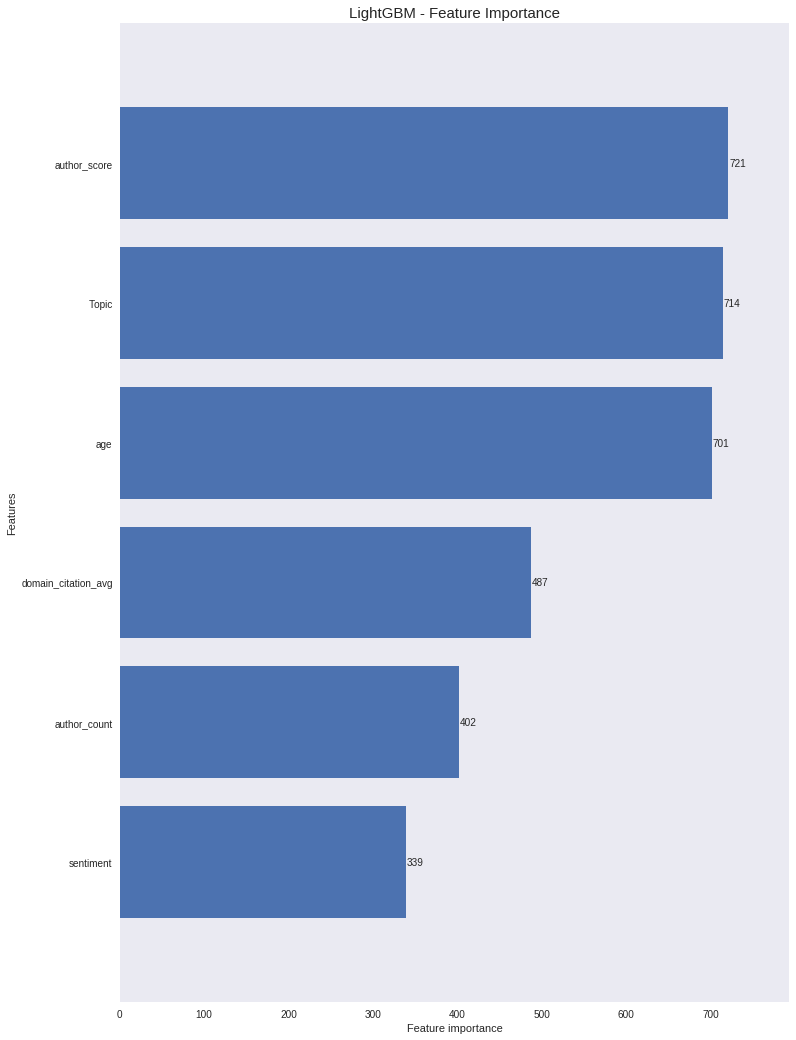

In [139]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()
fig.savefig('lgbm.png')

In [138]:
plt.savefig('lgbm_arxiv.png')